In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300 

In [2]:
confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data = pd.read_csv(confirmed)
data =data.drop(["Province/State","Lat","Long"],1).groupby('Country/Region').sum()
data = data[data.iloc[:,-1] > 300]
all_data = data.T
all_data.head(5)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


In [3]:
data = all_data[['US']]
Y = data[data['US']> 0].reset_index(drop=True).iloc[:,0].values
print(Y)

[       1        1        2 ... 97787422 97804801 97900497]


In [4]:
target_name='US'

In [5]:
data = all_data[[target_name]]
Y = data[data[target_name]> 0].reset_index(drop=True).iloc[:,0].values
print(Y)

[       1        1        2 ... 97787422 97804801 97900497]


In [6]:
X_train = data.iloc[:len(Y),:].values
data.head(200)

Country/Region,US
1/22/20,1
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,5
...,...
8/4/20,4756226
8/5/20,4810362
8/6/20,4870414
8/7/20,4930854


In [7]:
split_point = int(0.7*len(data))
print(split_point)
train = data[0:split_point]
test = data[split_point:]

716


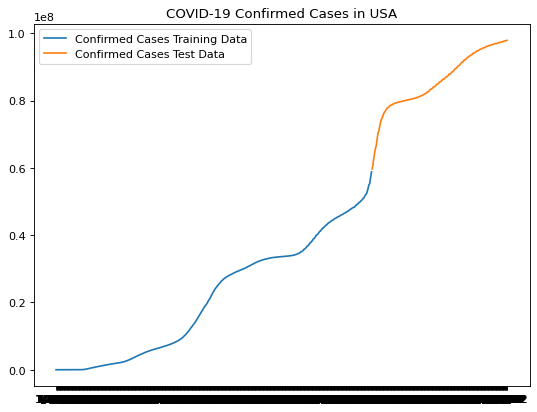

In [8]:
plt.figure(num=None, figsize=(8,6), dpi=80)
plt.plot(train, label="Confirmed Cases Training Data")
plt.plot(test, label="Confirmed Cases Test Data")
plt.legend()
plt.title("COVID-19 Confirmed Cases in USA")
plt.show()

In [9]:
model =  auto_arima(Y,exogenous=X_train,
                    start_p=1, start_q=1,max_p=3, max_q=3, m=7 ,start_P=0, seasonal=True,
                    d=0, D=0, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=26438.881, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=38340.733, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=37406.289, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=39278.287, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=26840.082, Time=0.34 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=26176.108, Time=1.03 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=26179.487, Time=0.77 sec
 ARIMA(1,0,1)(2,0,1)[7] intercept   : AIC=inf, Time=2.67 sec
 ARIMA(1,0,1)(1,0,2)[7] intercept   : AIC=26140.188, Time=1.83 sec
 ARIMA(1,0,1)(0,0,2)[7] intercept   : AIC=26247.684, Time=1.49 sec
 ARIMA(1,0,1)(2,0,2)[7] intercept   : AIC=26130.734, Time=2.51 sec
 ARIMA(0,0,1)(2,0,2)[7] intercept   : AIC=inf, Time=2.94 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=26253.014, Time=2.79 sec
 ARIMA(2,0,1)(2,0,2)[7] intercept   :

In [10]:
X = data

In [11]:
forecast = model.predict(15,exogenous =X.iloc[len(Y):,:].values)
y_forec, conf_int  = model.predict(15,exogenous =X.iloc[len(Y):,:].values,return_conf_int=True,alpha=0.05)
print('forecast',y_forec, 'confidence intervel',conf_int)

forecast [97959477.1312288  98001056.43020573 98009787.8828681  98017214.12710422
 98049850.88580394 98070647.58604345 98137782.86675018 98183019.45918405
 98207689.57861489 98204329.62792385 98199607.02106717 98217037.01956199
 98221330.45605025 98272373.14292315 98300819.54924324] confidence intervel [[9.78194363e+07 9.80995180e+07]
 [9.77558643e+07 9.82462486e+07]
 [9.76380193e+07 9.83815565e+07]
 [9.75160505e+07 9.85183777e+07]
 [9.74151186e+07 9.86845831e+07]
 [9.73019456e+07 9.88393496e+07]
 [9.72355065e+07 9.90400592e+07]
 [9.71119444e+07 9.92540945e+07]
 [9.69614576e+07 9.94539215e+07]
 [9.67741483e+07 9.96345110e+07]
 [9.65838731e+07 9.98153409e+07]
 [9.64153028e+07 1.00018771e+08]
 [9.62353310e+07 1.00207330e+08]
 [9.61047056e+07 1.00440041e+08]
 [9.59238554e+07 1.00677784e+08]]


In [12]:
Actual_df =pd.DataFrame(Y,columns=['Actuals'])
for i in ['forecast','Ci_low','Ci_high']:
    Actual_df[i] = np.nan
forecast_df= pd.DataFrame(conf_int,columns = ['Ci_low','Ci_high'])
forecast_df['forecast'] =y_forec
forecast_df = Actual_df.append(forecast_df).reset_index(drop=True)
forecast_df.tail(25)

,Actuals,forecast,Ci_low,Ci_high
1013,97504710.0,NaN,NaN,NaN
1014,97553379.0,NaN,NaN,NaN
1015,97627229.0,NaN,NaN,NaN
1016,97697717.0,NaN,NaN,NaN
1017,97736484.0,NaN,NaN,NaN
1018,97741501.0,NaN,NaN,NaN
1019,97749004.0,NaN,NaN,NaN
1020,97787422.0,NaN,NaN,NaN
1021,97804801.0,NaN,NaN,NaN
1022,97900497.0,NaN,NaN,NaN


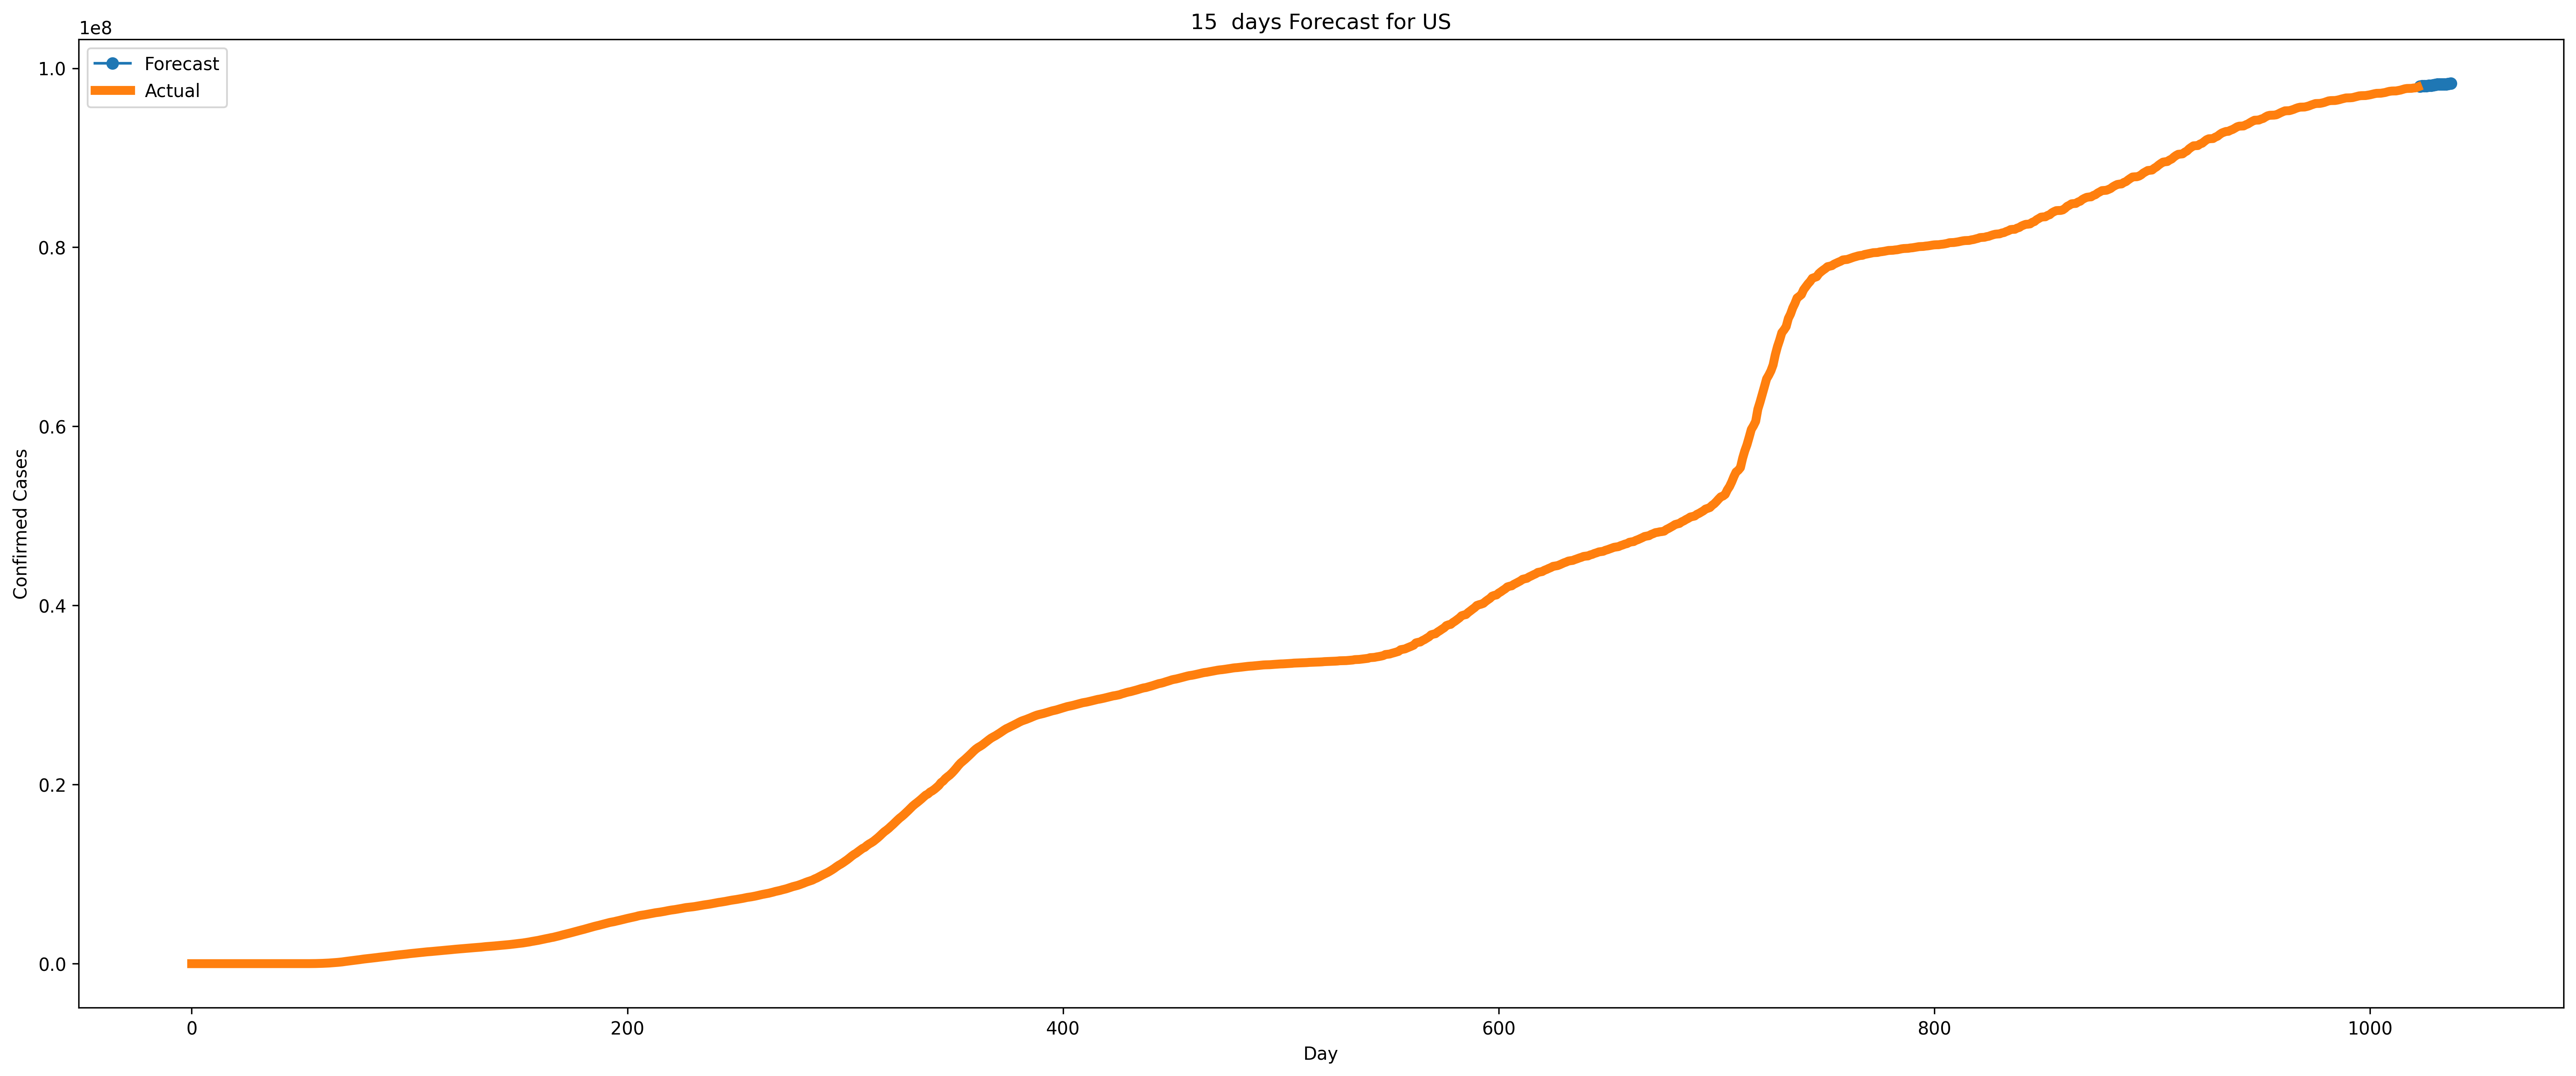

In [20]:
plt.figure(figsize=(25,10))
plt.plot(forecast_df.index,forecast_df.forecast,'-o')
plt.plot(forecast_df.index,forecast_df.Actuals,linewidth=5)
plt.legend(['Forecast','Actual'])
plt.title('15  days Forecast for {}'.format(target_name))
plt.xlabel('Day')
plt.ylabel('Confirmed Cases')
plt.show()